In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from scipy.optimize import minimize
from scipy import optimize

In [ ]:

eps = 1e-3

alpha, beta = np.random.uniform(size=2)

x_vec = np.arange(0, 1.001, 0.001)

delta = np.random.normal(size=1001)
y = alpha * x_vec + beta + delta

In [ ]:
def D_linear(t, shape="float"):
    a, b = t[0], t[1]
    x = x_vec
    if shape == "tuple":
        return ((a * x + b - y) ** 2).sum(), 0
    return ((a * x + b - y) ** 2).sum()


In [ ]:
def D_rational(t, shape="float"):
    a, b = t[0], t[1]
    x= x_vec
    if shape == "tuple":
        return ((a / (1 + b * x) - y) ** 2).sum(), 0
    return ((a / (1 + b * x) - y) ** 2).sum()

In [ ]:
def D_liniar_der(t, shape="float"):
    a, b = t[0], t[1]
    x = x_vec
    if shape == 'tuple':
        return np.array([[(2*x*(a * x + b - y)).sum(), (2*(a * x + b - y)).sum()],
                         [0, 0]])
    return np.array([(2*x*(a * x + b - y)).sum(),
                     (2*(a * x + b - y)).sum()])

In [ ]:
def D_rational_der(t, shape="float"):
    a, b = t[0], t[1]
    x = x_vec
    if shape == 'tuple':
        return np.array([[(2 * (a / (1 + b * x) - y) / (1 + b * x)).sum(),
                          (-2 * a * x * (-y + a / (1 + b * x)) / (1 + b * x) ** 2).sum()],
                         [-1, 1]])
    return np.array([(2 * (a / (1 + b * x) - y) / (1 + b * x)).sum(),
                     (-2 * a * x * (-y + a / (1 + b * x)) / (1 + b * x) ** 2).sum()])

In [ ]:
def gradient_descent(func, grad_func, tmp, tol, step=0.00075, max_iter=1000):
    for i in range(max_iter):
        f_val = func(tmp)
        grad_value = grad_func(tmp)
        
        a_tmp = tmp[0] - step * grad_value[0]
        b_tmp = tmp[1] - step * grad_value[1]
        tmp = [a_tmp, b_tmp]
        
        f_new_val = func(tmp)
        if abs(f_new_val - f_val) <= tol:
            return {'fun': f_new_val,
                    'x': [a_tmp, b_tmp],
                    'nit': i}

In [36]:
 report = pd.DataFrame()
 for function, derivative in zip([D_linear, D_rational],[D_liniar_der, D_rational_der]): 
  a_init = -1
  b_init = 1
  gd_result = gradient_descent(function, derivative, [a_init, b_init], tol=eps)
  newtons = minimize(function, [a_init, b_init], method='Newton-CG', tol=eps, jac=derivative)
  cgd = minimize(function, [a_init, b_init], method='CG', tol=eps)
  lm = optimize.root(function, [a_init, b_init], method='lm', tol=eps, args = ('tuple'), jac=derivative)

  res = [[function.__name__, 'Gradient Descent', gd_result['x'], gd_result['nit'], gd_result['fun']],
        [function.__name__,'Newton’s method', newtons.x, newtons.nit, newtons.fun],
        [function.__name__, 'Conjugate Gradient Descent', cgd.x, cgd.nit, cgd.fun],
        [function.__name__, 'Levenberg-Marquardt algorithm', lm.x, lm.nfev, lm.fun[0]]]
  report = report.append(res, ignore_index=True)
report.columns = ["function name", "method name", "a, b", "iterations", 'function_value']
report = report.set_index(['function name', 'method name'])
report

,function name,method name,"a, b",iterations,function_value
0,D_linear,Gradient Descent,"[0.5009323764523131, 1.0356589877630593]",59,955.910148
1,D_linear,Newton’s method,"[0.5039486389356569, 1.0359324051989947]",2,955.906211
2,D_linear,Conjugate Gradient Descent,"[0.5039486736475228, 1.0359324002434107]",2,955.906211
3,D_linear,Levenberg-Marquardt algorithm,"[0.4999980652250948, 1.0391730290120378]",36,955.909118
4,D_rational,Gradient Descent,"[1.0729581684909388, -0.3146800321393276]",68,956.363069
5,D_rational,Newton’s method,"[1.0713381481952011, -0.3165058169382578]",9,956.362157
6,D_rational,Conjugate Gradient Descent,"[1.0714687969782188, -0.3163675460078928]",13,956.362150
7,D_rational,Levenberg-Marquardt algorithm,"[1.0861692486887515, -0.304212718556741]",39,956.446341


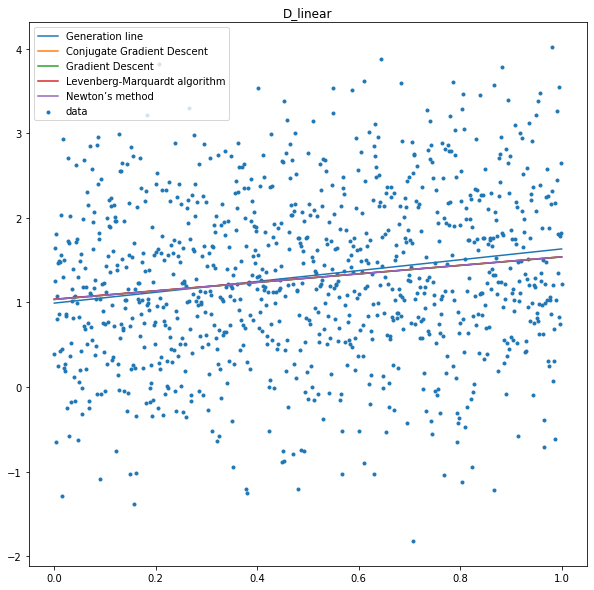

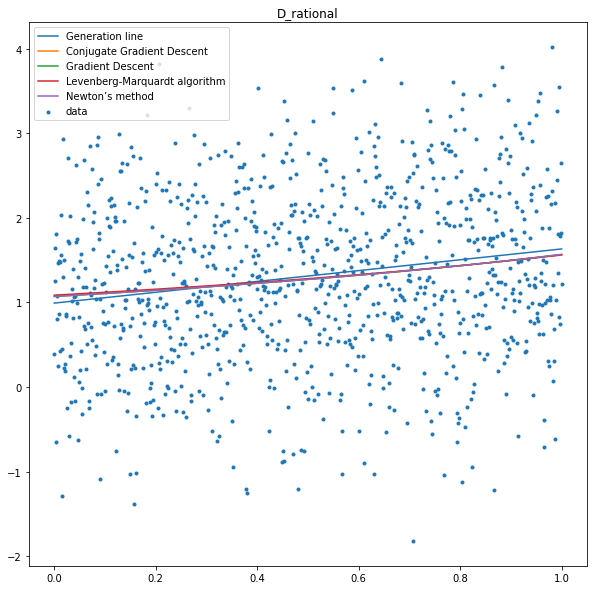

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)
for i, func in enumerate(report.index.levels[0]):
    plt.plot(x_vec, alpha * x_vec + beta, label='Generation line')
    plt.scatter(x_vec, y, label = 'data', marker='.')
    for method in report.index.levels[1]:
        example = report.loc[func, method]
        if func == 'D_linear':
            plt.plot(x_vec, example['a, b'][0] * x_vec + example['a, b'][1], label = method)
        if func == 'D_rational':
            plt.plot(x_vec, example['a, b'][0] / (1 + example['a, b'][1] * x_vec), label = method)
    plt.title(func)
    plt.legend()
    plt.show()